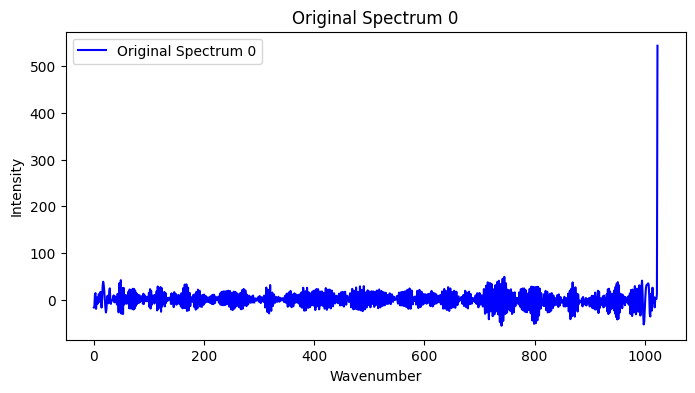

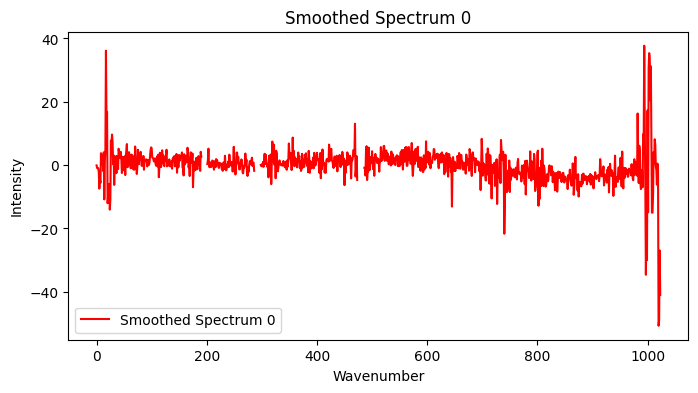

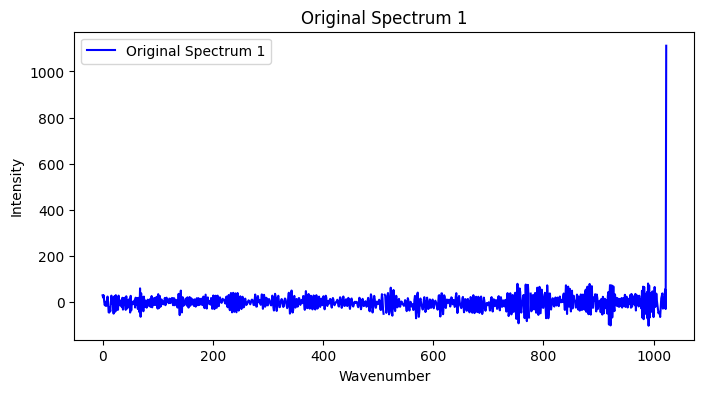

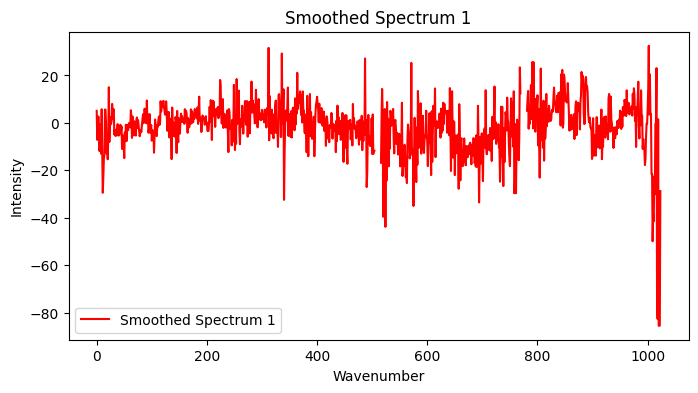

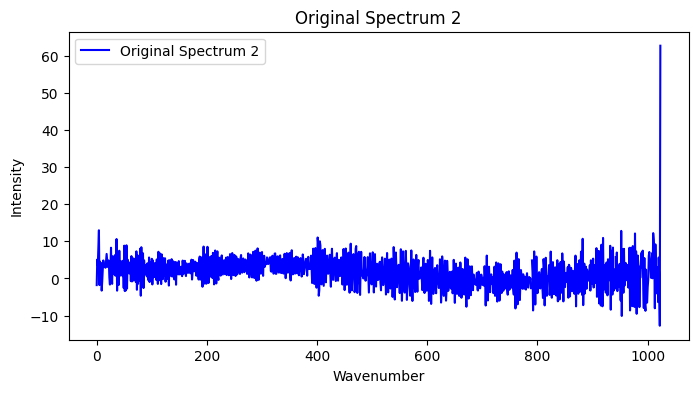

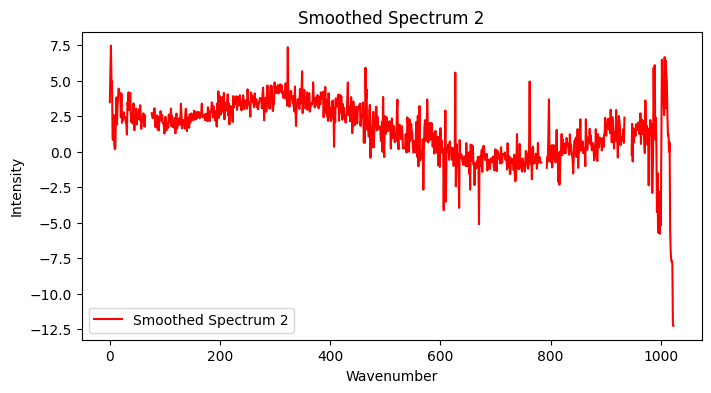

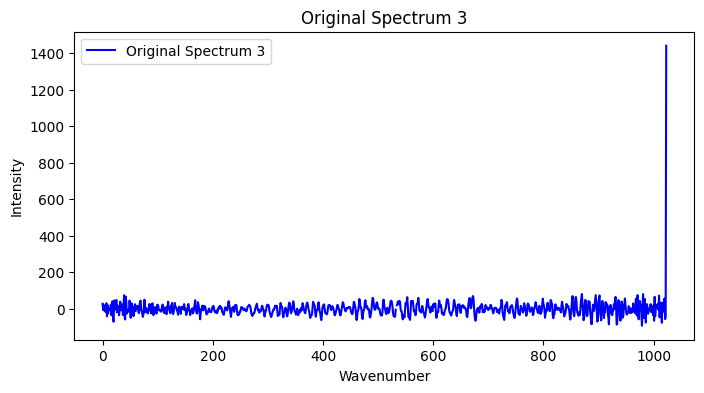

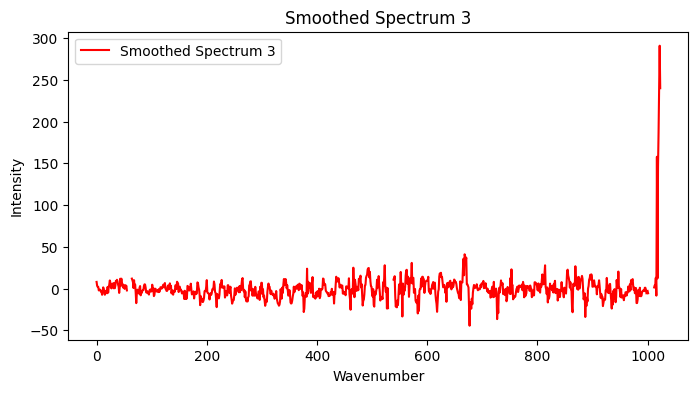

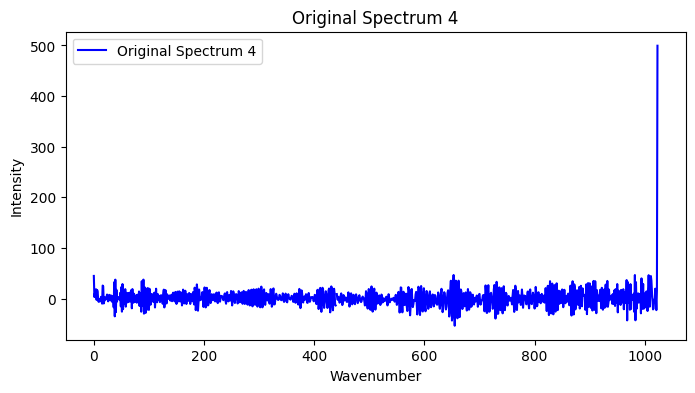

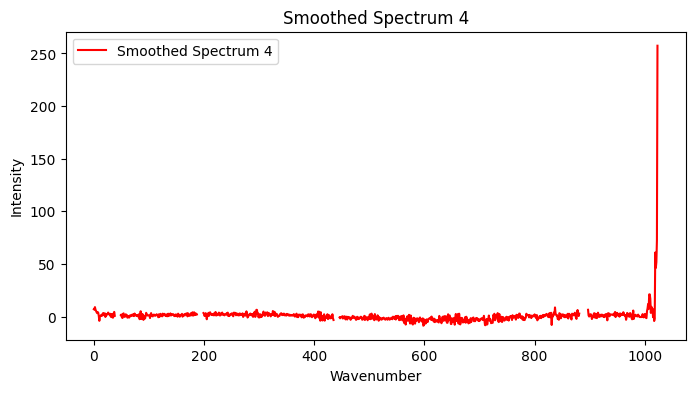

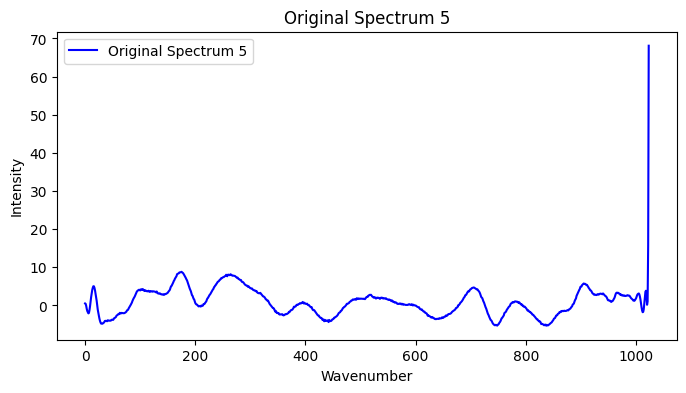

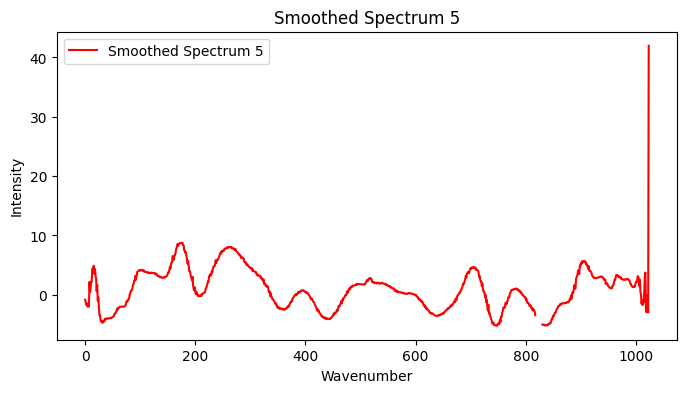

In [1]:
# SAVITSKY-GOLAY (SEVERAL SPECTRUM)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Function to apply Savitzky-Golay (sliding window)
def savgol_sliding_window(data, min_window_size, max_window_size, poly_order):
    n = len(data)
    smoothed_data = np.zeros(n)

    for i in range(n):
        # Define dynamic window boundaries
        start = max(0, i - np.random.randint(min_window_size, max_window_size) // 2)
        end = min(n, i + np.random.randint(min_window_size, max_window_size) // 2 + 1)

        # Extract subset of data within window
        subset_data = data[start:end]

        # Ensure poly_order is less than minimum window length
        poly_order = min(poly_order, min(end - start - 1, max_window_size) - 1)

        # Apply Savitzky-Golay filter
        smoothed_subset = savgol_filter(subset_data, min(end - start - 1, max_window_size), poly_order)

        # Replace center pixel of window with fitted polynomial value
        smoothed_data[i] = smoothed_subset[len(smoothed_subset) // 2]

    return smoothed_data

# Read CSV files & concatenate in DataFrame
data_files = ['/kaggle/input/corectbaseseveral/corrected_baseline_spectrum0.csv', '/kaggle/input/corectbaseseveral/corrected_baseline_spectrum1.csv', '/kaggle/input/corectbaseseveral/corrected_baseline_spectrum2.csv', '/kaggle/input/corectbaseseveral/corrected_baseline_spectrum3.csv', '/kaggle/input/corectbaseseveral/corrected_baseline_spectrum4.csv','/kaggle/input/corectbaseseveral/corrected_baseline_spectrum5.csv']
df = pd.concat((pd.read_csv(filename) for filename in data_files))

# Extract all spectra
all_spectra = df['Corrected_Intensity'].values.reshape(len(data_files), -1)

# Plot original & smoothed spectra
for i, spectrum in enumerate(all_spectra):
    smoothed_spectrum = savgol_sliding_window(spectrum, min_window_size=5, max_window_size=15, poly_order=2)

    # Plot original spectrum
    plt.figure(figsize=(8, 4))
    plt.plot(spectrum, label=f'Original Spectrum {i}', color='blue')
    plt.xlabel('Wavenumber')
    plt.ylabel('Intensity')
    plt.title(f'Original Spectrum {i}')
    plt.legend()
    plt.show()

    # Plot smoothed spectrum
    plt.figure(figsize=(8, 4))
    plt.plot(smoothed_spectrum, label=f'Smoothed Spectrum {i}', color='red')
    plt.xlabel('Wavenumber')
    plt.ylabel('Intensity')
    plt.title(f'Smoothed Spectrum {i}')
    plt.legend()
    plt.show()